## Bayesian Inference Example with Uniform Prior

https://jkkweb.sitehost.iu.edu/articles/Kruschke2013JEPG.pdf
https://stats.stackexchange.com/questions/130389/bayesian-equivalent-of-two-sample-t-test

Below lets review the Metropolis algorithm. Below we have data for two groups.
One test group and one experiment group. We want to know if the mean between the
two groups is different, but our data is too sparse for a $t$-test.

Suppose we have a treatment and experiment group with distributions $\mathcal{N}(\mu_1, \sigma_1)$ and $\mathcal{N}(\mu_2, \sigma_2)$.
We want to estimate the parameter vector 
$$\theta = (\mu_1, \sigma_1, \mu_2, \sigma_2)\text{.}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Example

Below we use some hypothetical test scores. Group 1 is our experiment group and group 2 is our control group. Group 1 recieved an intervention before.a test. Then we have there before and after test scores. We wish to test the difference in the means of the two groups, but the small samples prevent us from performing a t-test.

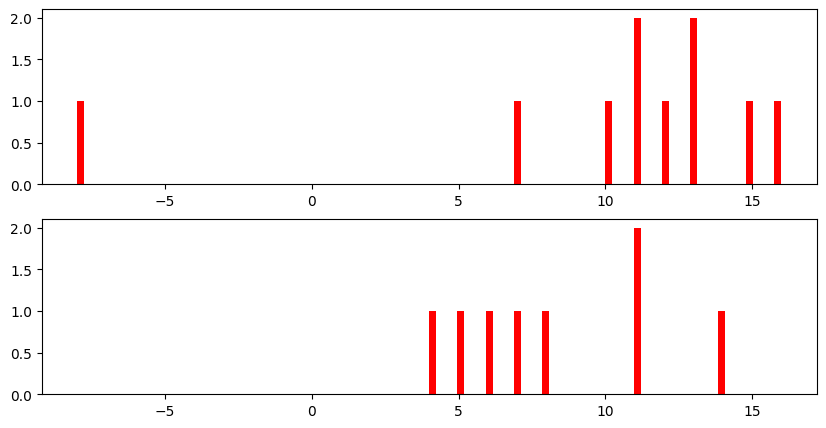

In [3]:
Group = np.array([1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2])
Pre = np.array([18,18,21,18,18,20,23,23,21,17,18,24,20,18,24,21,15,19])
Post = np.array([10,25,33,29,33,36,34,36,34,27,29,29,24,26,38,27,22,30])

improvement = Post - Pre

trt = improvement[Group==1]
ctrl = improvement[Group==2]

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.hist(trt, bins=100, color='red', range=(improvement.min(), improvement.max()))
plt.subplot(2,1,2)
plt.hist(ctrl, bins=100, color='red', range=(improvement.min(), improvement.max()))
plt.show()

# Metropolis-Hastings

The Metropolis-Hastings algorithm is a popular Markov Chain Monte Carlo (MCMC) method for generating samples from a target distribution, when direct sampling is difficult or impossible. The algorithm consists of the following steps:

Initialize the chain with a starting point, $x_0$.

For each iteration, $t = 1, 2, \ldots,$ do the following:
a. Propose a new sample, $y$, from a proposal distribution, $q(y|x_{t-1})$.
b. Calculate the acceptance probability, $\alpha(x_{t-1}, y)$, given by:

$$\alpha(x_{t-1}, y) = \min\left{1, \frac{p(y) q(x_{t-1}|y)} {p(x_{t-1}) q(y|x_{t-1})}\right}$$

c. Generate a uniform random variable, $u$, and set $x_t = y$ if $u \leq \alpha(x_{t-1}, y)$ and $x_t = x_{t-1}$ otherwise.

Repeat the above steps until the chain converges to the stationary distribution, $p(x)$.

The acceptance probability, $\alpha(x_{t-1}, y)$, ensures that the Markov chain transitions to new states that are more likely under the target distribution, while still allowing for transitions to less likely states with some probability. The algorithm can be adapted to sample from complex distributions by choosing appropriate proposal distributions, and can be run for a large number of iterations to generate a large number of samples that converge to the target distribution.

# Bayesian Inference T-test
The Metropolis-Hastings algorithm is a Markov Chain Monte Carlo (MCMC) method used to generate samples from a target distribution when the probability density function of the target distribution is difficult or impossible to calculate directly. In a Bayesian t-test, the Metropolis-Hastings algorithm estimates the posterior distribution of the mean difference between two groups, given a prior distribution of the means and a likelihood function based on the observed data.

The Metropolis-Hastings algorithm generates a candidate sample using a proposal distribution. The acceptance probability of the candidate sample is calculated as the ratio of the candidate sample's posterior density and the recent sample's posterior density. If the acceptance probability is greater than a uniformly drawn random number, the candidate sample becomes the current sample. If not, the candidate remains unchanged. We repeat the algorithm for many iterations, and the resulting samples form an approximation of the target distribution.

In the Bayesian t-test, the Metropolis-Hastings algorithm generates samples from the posterior distribution of the mean difference between two groups. The user specifies the prior distribution on the means, and the likelihood function is calculated based on the observed data. The algorithm starts with an initial guess for the mean difference and generates candidate samples using a proposal distribution, such as a normal distribution centered at the current selection. The acceptance probability of the candidate sample is calculated based on the ratio of the candidate sample's posterior density and the recent sample's posterior density. The algorithm repeats for many iterations, and the resulting samples form an approximation of the posterior 
distribution of the mean difference. Finally, we take the mean of the posterior distribution as the estimated mean difference, and the standard deviation of the posterior distribution gives the uncertainty around the estimate.



<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


P(mu1 - mu2 > 0) = 0.952


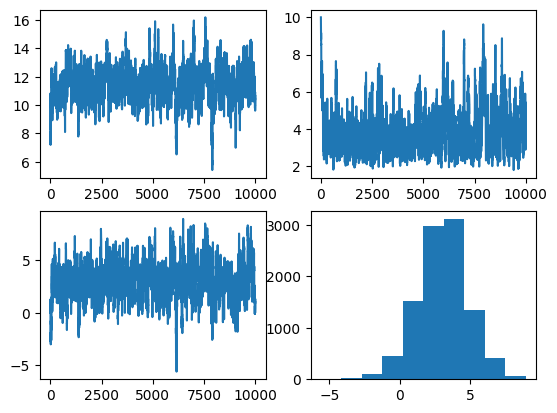

In [1]:



def prior(th):
    mu1, sig1, mu2, sig2 = th
    if sig1 <= 0 or sig2 <= 0:
        return 0
    return 1

def lik(th):
    mu1, sig1, mu2, sig2 = th
    return np.prod(stats.norm.pdf(trt, loc=mu1, scale=sig1)) * np.prod(stats.norm.pdf(ctrl, loc=mu2, scale=sig2))

def post(th):
    return prior(th) * lik(th)

# Starting values
mu1, sig1, mu2, sig2 = 10, 10, 10, 10
th0 = np.array([mu1, sig1, mu2, sig2])

# MCMC
nit = 10000
results = np.zeros((nit, 4))
th = th0
results[0, :] = th0
for it in range(1, nit):
    cand = th + np.random.normal(scale=0.5, size=4)
    ratio = post(cand)/post(th)
    if np.random.uniform() < ratio:
        th = cand
    results[it, :] = th

mu1s = results[:, 0]
sig1s = results[:, 1]
mu2s = results[:, 2]
sig2s = results[:, 3]

plt.subplot(2, 2, 1)
plt.plot(mu1s)

plt.subplot(2, 2, 2)
plt.plot(sig1s)

plt.subplot(2, 2, 3)
plt.plot(mu1s-mu2s)

plt.subplot(2, 2, 4)
plt.hist(mu1s-mu2s)

print("P(mu1 - mu2 > 0) =", np.mean(mu1s-mu2s > 0))

That is there is a 95% chance that the intevention led to higher test scores on average.